#### 코로나 바이러스 영향을 중국인 관광객 증감분석

##### 외국인 출입국 통계 데이터 

한국관광 데이터랩 : https://datalab.visitkorea.or.kr/
- 제공하는 csv파일을 추가작업으로 년월일 xlsx로 변경


##### 엑셀데이터 로드
기준 2019 1월 데이터

In [32]:
# openpyxl 모듈 설치
!pip install openpyxl

In [33]:
# 데이터 분석용 모듈 임포트
import pandas as pd
import numpy as np

In [34]:
# 2019년 1월 엑셀데이터 로드
# 전년동기 ~ 구성비까지의 컬럼은 필요없음
# 행 전년동기 ~ 구성비까지 내용은 스킵
kto_201901 = pd.read_excel('./data/kto_201901.xlsx', header=1, usecols='A:G', skipfooter=4)

kto_201901

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


In [35]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526
66,교포,0,0,0,0,15526,15526


#### 데이터 전처리

In [36]:
# 데이터 수와 타입
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [37]:
# 행과 열값 리턴
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [38]:
# 수치통계
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [39]:
# 각 컬럼 0 부분이 필터링 (체크)
condition = (kto_201901['관광'] == 0) | \
            (kto_201901['상용'] == 0) | \
            (kto_201901['공용'] == 0) | \
            (kto_201901['유학/연수'] == 0) | \
            (kto_201901['기타'] == 0)
            
kto_201901_zero = kto_201901[condition]
kto_201901_zero

,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [40]:
# df에 기준년월 추가
kto_201901['기준년월'] = '2019-01'
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [41]:
# 국적데이터만 67개 중
# unique()는 numpy.ndarray 변환
# 원래 67개, unique() 67개 (의미없음)
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [42]:
# 대륙 목록
contients_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

contients_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [43]:
kto_201901[kto_201901['국적'].isin(contients_list) == False]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01
6,말레이시아,19043,95,7,99,2821,22065,2019-01
7,필리핀,14279,211,161,184,15638,30473,2019-01
8,인도네시아,14183,136,38,187,4298,18842,2019-01
9,싱가포르,8372,94,8,48,1333,9855,2019-01
10,미얀마,1304,10,31,67,3877,5289,2019-01


In [44]:
kto_201901_country = kto_201901[(kto_201901.국적.isin(contients_list) == False)]
# kto_201901_country.국적.unique()
kto_201901_country

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
5,태국,34004,37,199,96,6998,41334,2019-01
6,말레이시아,19043,95,7,99,2821,22065,2019-01
7,필리핀,14279,211,161,184,15638,30473,2019-01
8,인도네시아,14183,136,38,187,4298,18842,2019-01
9,싱가포르,8372,94,8,48,1333,9855,2019-01
10,미얀마,1304,10,31,67,3877,5289,2019-01


In [45]:
kto_201901_country.국적.unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [46]:
# 인덱스 재설정
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True)
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
55,대양주 기타,555,3,4,0,52,614,2019-01
56,남아프리카공화국,368,9,1,6,616,1000,2019-01
57,아프리카 기타,768,718,90,206,908,2690,2019-01
58,국적미상,33,4,0,1,16,54,2019-01
59,교포,0,0,0,0,15526,15526,2019-01


In [47]:
# 대륙컬럼 다시 만들기
contients = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타'] + ['교포']

print(contients)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타', '교포']


In [48]:
kto_201901_country_newindex['대륙'] = contients
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아
1,대만,86393,74,22,180,1285,87954,2019-01,아시아
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아
3,마카오,2506,2,0,17,45,2570,2019-01,아시아
4,태국,34004,37,199,96,6998,41334,2019-01,아시아


In [49]:
kto_201901_country_newindex['대륙'] = contients
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아
56,남아프리카공화국,368,9,1,6,616,1000,2019-01,아프리카
57,아프리카 기타,768,718,90,206,908,2690,2019-01,아프리카
58,국적미상,33,4,0,1,16,54,2019-01,기타
59,교포,0,0,0,0,15526,15526,2019-01,교포


In [50]:
# 국적별 관광객 비율
# 관광, 상용, 공용, 유학/연수, 기타 중 관광
# kto_201901_country_newindex.관광 # 밑에랑 똑같음
kto_201901_country_newindex['관광객비율(%)'] = \
    round((kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계']) * 100, 1) #소수점 첫째자리까지

kto_201901_country_newindex

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3
8,싱가포르,8372,94,8,48,1333,9855,2019-01,아시아,85.0
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7


In [51]:
# 분석 - 관광객 비율이 높은 국가와 낮은 국가
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [52]:
# 대륙별 관광객 비율
kto_201901_country_newindex.pivot_table(values='관광객비율(%)', index='대륙', sort = False) # , aggfunc = 'mean',  sort = False는 대륙순서대로

,관광객비율(%)
대륙,
아시아,59.624000
아메리카,68.200000
유럽,63.826087
오세아니아,84.833333
아프리카,32.700000
기타,61.100000
교포,0.000000


In [53]:
# 중국 관광객만
kto_201901_country_newindex[(kto_201901_country_newindex['국적'] == '중국')]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [54]:
# 전체 외국인 관광객 수
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [55]:
# 전체 비율

kto_201901_country_newindex['전체비율(%)'] = \
    round((kto_201901_country_newindex['관광'] / tourist_sum ) * 100, 1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5,0.3
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8


In [56]:
# 관광객 전체비율이 높은 나라 내림차순 정렬
kto_201901_country_newindex.sort_values('전체비율(%)', ascending=False).head() # ascending=False 내림차순

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9


##### 위 내용을 자동화할 수 있는 함수 만들기

125개 엑셀파일 전처리

In [57]:
# 엑셀 파일 데이터프레임으로 재정리 함수

def create_kto_data(yyyy, mm):  # 년월 받아서 엑셀파일 오픈
    
    # 1. 엑셀파일 이름과 경로를 지정
    file_path = f'./data/kto_{yyyy+mm}.xlsx'
    # print(file_path)
    
    # 2. 엑셀파일 불러오기
    df = pd.read_excel(file_path, header=1, usecols='A:G', skipfooter=4)
    
    # 3. 기준년월 컬럼 추가
    df['기준년월'] = f'{yyyy}-{mm}'
    
    # 4. 국적 컬럼에 대륙 제거 국가만 남기기
    contients_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = df['국적'].isin(contients_list) == False
    df_country = df[condition].reset_index(drop = True)
    
    # 5. 대륙 컬럼을 추가
    contients = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    
    df_country['대륙'] = contients
    
    # 6. 국가별 관광객비율(%) 컬럼추가
    df_country['관광객비율(%)'] = round((df_country['관광'] / df_country['계']) * 100, 1)
    
    # 7. 전체비율(%) 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round((df_country['관광'] / tourist_sum ) * 100, 1)
    
    # 8. 결과 출력
    return df_country

create_kto_data('2020','05')

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,45,105,3,41,219,413,2020-05,아시아,10.9,0.7
1,대만,31,8,3,33,114,189,2020-05,아시아,16.4,0.5
2,홍콩,6,5,0,2,11,24,2020-05,아시아,25.0,0.1
3,마카오,0,0,0,1,0,1,2020-05,아시아,0.0,0.0
4,태국,25,7,0,13,150,195,2020-05,아시아,12.8,0.4
5,말레이시아,2,8,0,8,72,90,2020-05,아시아,2.2,0.0
6,필리핀,725,1,12,4,797,1539,2020-05,아시아,47.1,11.9
7,인도네시아,581,3,5,9,1157,1755,2020-05,아시아,33.1,9.5
8,싱가포르,6,10,0,3,30,49,2020-05,아시아,12.2,0.1
9,미얀마,178,1,0,6,516,701,2020-05,아시아,25.4,2.9


##### 반복문으로 125개 엑셀 하나로 합치기

In [58]:
# kto_yyyymm.xlxs

df = pd.DataFrame()
temps = []

for yyyy in range(2010, 2021): # 2020년까지니깐 +1 -> 2021을 넣어줘야 함
    for mm in range(1, 13):
        mm_str = str(mm).zfill(2)
        yyyymm = f'{yyyy}{mm_str}'
        if(yyyymm == '202006'): break
        temp = create_kto_data(str(yyyy), mm_str)
        temps.append(temp)

        # print(yyyymm, temp.shape, sep='|')

print(len(temps))
df = pd.concat(temps)

125


In [59]:
df = df.reset_index(drop=True)
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0
7499,교포,0,0,0,0,790,790,2020-05,교포,0.0,0.0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [61]:
# 최종 결과 저장
df.to_excel('./result/kto_total.xlsx', index=False)

#### 나라별로 엑셀파일 만들기

##### 60개국 나라별 엑셀 만들기

In [63]:
# 7500 row 데이터 나라별
df_china = df[(df['국적'] == '중국')]
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


In [64]:
df_china.to_excel('./result/kto_중국.xlsx', index=False)

In [65]:
# 국적 리스트
country_list = df['국적'].unique()
country_list

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [66]:
# 60개의 엑셀 파일
for country in country_list:
    # 국적 필터링
    df_filter = df[(df['국적'] == country)]
    df_filter.to_excel(f'./result/kto_{country}.xlsx', index=False)

#### 결론

##### 3개월 데이터분석 프로젝트 -> 1.5개월 이상이 데이터 전처리하는데 소요 - 정합성, 오류, 결측치 확인
##### Next Step -> 분석, 시각화

##### 시각화 (Visualization)
예전엔 차트, 분석 차트화

In [67]:
# 중국 관광객
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


##### Matplotlib 사용
- Matplotlib은 한글 지원이 자동으로 되지 않기 때문에 추가 설정이 필요함
- Seaborn 추가

In [83]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 나눔고딕, NanumGothic
rc('font', family=font)
matplotlib.rcParams['axes.unicode_minus'] = False

In [70]:
# 중국 관광객 데이터 로드
df_filter = pd.read_excel('./result/kto_중국.xlsx')
df_filter

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
2,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
3,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
4,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
120,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
121,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
122,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
123,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


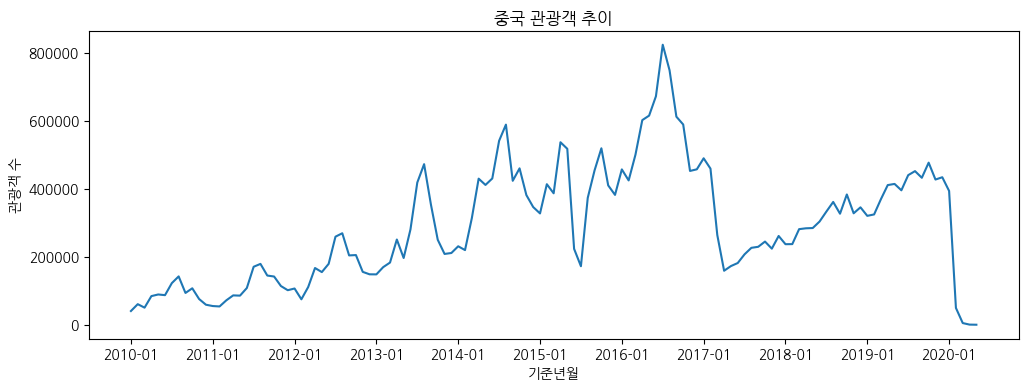

In [78]:
plt.figure(figsize=(12, 4))
plt.plot(df_filter['기준년월'], df_filter['관광'], scalex=True)

plt.title('중국 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객 수')

# plt.xticks(rotation=90)
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01', '2020-01'])

plt.show()

In [79]:
# 중국, 일본, 미국, 홍콩, 대만 5개국 라인 차트 생략

In [80]:
# 히트맵
df['년도'] = df['기준년월'].str.slice(0, 4)
df['월'] = df['기준년월'].str.slice(5, 7)
df

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0,2020,05
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0,2020,05
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0,2020,05


In [81]:
df_china = df[(df['국적'] == '중국')]
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0,2020,03
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2,2020,04


In [84]:
# pivot
df_pivot = df_china.pivot_table(values='관광', index='년도', columns='월')
df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


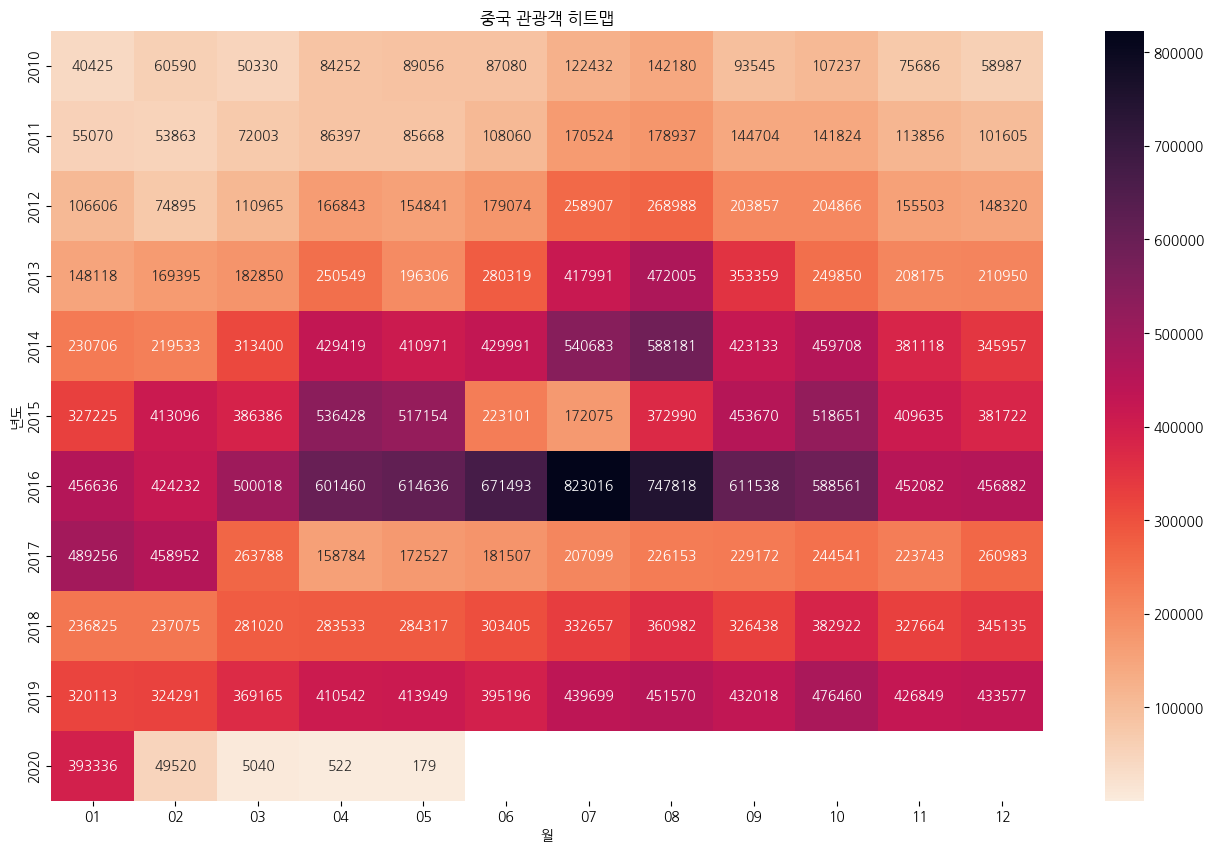

In [86]:
# 히트맵 출력
plt.figure(figsize=(16, 10))

sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')

plt.title('중국 관광객 히트맵')

plt.show()

##### 히트맵 결과 해석
- 여름(7, 8월)에 중국 관광객이 가장 많음
- 여름 > 봄, 가을 > 겨울
- 2015년 7월, 2017년 4~6월, 2020년도 2월~ 관광객 급격하게 줄었음
- 뉴스 검색을 통해서 관광객 감소 이유 찾음